
This dataset contains Uber trip log details, such as:
- Trip start and end times
- Trip category (e.g., Business or Personal)
- Trip start and stop locations
- Distance covered (in miles)
- Trip purpose, where available

The dataset has 1156 rows and 7 columns, with some missing data.

Feature Description:
 START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

Missing Values per Column:
 START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

Statistical Summary:
               MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


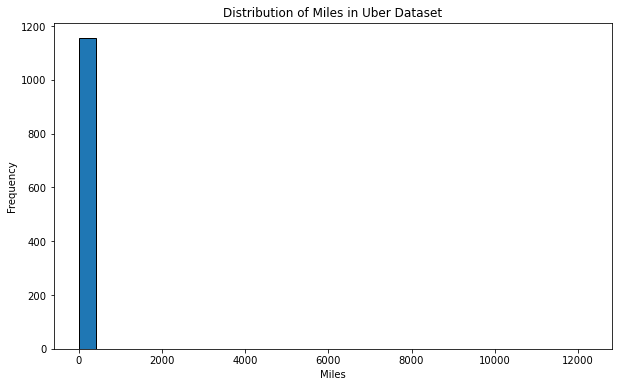


Correlation Matrix:
        MILES
MILES    1.0


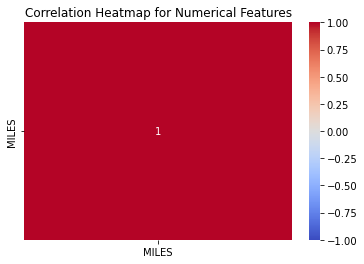

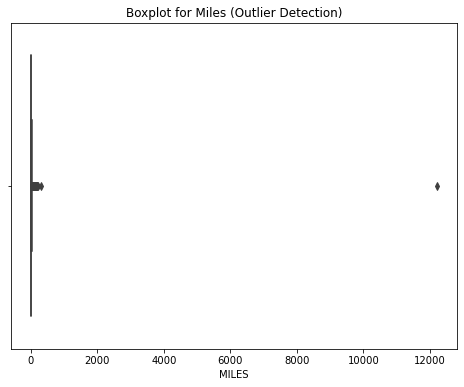


Detected Outliers in MILES:
         MILES  MILES_zscore
1155  12204.7     33.923995


In [10]:
# Part 1: Data Understanding and Exploration

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = 'UberDataset.csv'  # Replace with your file path
uber_data = pd.read_csv(file_path)

# Step 1: Dataset Overview
# Basic description of the dataset contents
dataset_overview = """
This dataset contains Uber trip log details, such as:
- Trip start and end times
- Trip category (e.g., Business or Personal)
- Trip start and stop locations
- Distance covered (in miles)
- Trip purpose, where available

The dataset has 1156 rows and 7 columns, with some missing data.
"""
print(dataset_overview)

# Step 2: Feature Description
# Display column names and data types
print("Feature Description:\n", uber_data.dtypes)

# Step 4: Missing Values
# Checking for missing values in each column
missing_values = uber_data.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)

# Step 5: Statistical Summary
# Calculating basic statistics for numerical columns, especially 'MILES'
stat_summary = uber_data.describe()
print("\nStatistical Summary:\n", stat_summary)

# Step 6: Data Distribution
# Visualizing the distribution of the 'MILES' column
plt.figure(figsize=(10, 6))
plt.hist(uber_data['MILES'].dropna(), bins=30, edgecolor='black')
plt.title("Distribution of Miles in Uber Dataset")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Step 7: Correlation Analysis
# Assuming 'TRIP_DURATION' is derived or added to the dataset in Part 2
# Calculating correlations for numerical features
# Here, we use only 'MILES' since other numerical columns may not be present in raw data
correlation_matrix = uber_data[['MILES']].corr()  # Adjust with other numerical features as needed
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# Step 8: Outlier Detection
# Using boxplot to visualize outliers in the 'MILES' feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=uber_data, x='MILES')
plt.title("Boxplot for Miles (Outlier Detection)")
plt.show()

# Alternatively, calculate z-scores for 'MILES' to flag outliers
uber_data['MILES_zscore'] = zscore(uber_data['MILES'])
outliers = uber_data[uber_data['MILES_zscore'].abs() > 3]  # Consider z-scores > 3 as outliers
print("\nDetected Outliers in MILES:\n", outliers[['MILES', 'MILES_zscore']])


In [11]:
#part 2 

from sklearn.preprocessing import StandardScaler

# Step 9: Handling Missing Data
# Drop rows with missing values in 'END_DATE', 'CATEGORY', 'START', and 'STOP'
uber_data.dropna(subset=['END_DATE', 'CATEGORY', 'START', 'STOP'], inplace=True)

# Replace missing values in 'PURPOSE' with 'Unknown'
uber_data['PURPOSE'].fillna('Unknown', inplace=True)

# Verify that there are no missing values left
print("\nMissing Values After Cleaning:\n", uber_data.isnull().sum())

# Step 10: Encoding Categorical Variables
# One-hot encoding for 'CATEGORY' and 'PURPOSE'
uber_data = pd.get_dummies(uber_data, columns=['CATEGORY', 'PURPOSE'], drop_first=True)

# Step 11: Feature Scaling
# Standardizing 'MILES' column
scaler = StandardScaler()
uber_data['MILES'] = scaler.fit_transform(uber_data[['MILES']])

# Step 12: Feature Selection
# Creating new features from 'START_DATE' and 'END_DATE' for additional analysis
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')
uber_data['TRIP_DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60  # Duration in minutes

# Drop columns that may not be directly useful for modeling (like original date columns)
final_data = uber_data.drop(columns=['START_DATE', 'END_DATE', 'START', 'STOP'])

# Display the preprocessed dataset
print("\nPreprocessed Dataset:\n", final_data.head())



Missing Values After Cleaning:
 START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
MILES_zscore    0
dtype: int64

Preprocessed Dataset:
       MILES  MILES_zscore  CATEGORY_Personal  PURPOSE_Between Offices  \
0 -0.253449     -0.044593                  0                        0   
1 -0.258085     -0.044872                  0                        0   
2 -0.267358     -0.045429                  0                        0   
3 -0.271994     -0.045707                  0                        0   
4  2.463317      0.118573                  0                        0   

   PURPOSE_Charity ($)  PURPOSE_Commute  PURPOSE_Customer Visit  \
0                    0                0                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4           

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error
import numpy as np

# Standardize all features to address scaling issues
scaler = StandardScaler()
X_classification = scaler.fit_transform(final_data.drop(columns=['CATEGORY_Personal']))
y_classification = final_data['CATEGORY_Personal']  # Binary target for classification

X_regression = scaler.fit_transform(final_data.drop(columns=['MILES']))
y_regression = final_data['MILES']

# Step 14: Data Splitting
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Step 15: Model Training with Cross-Validation and Hyperparameter Tuning

# Logistic Regression with Hyperparameter Tuning
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Tuning regularization parameter C
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)
best_logistic_model = grid_search.best_estimator_

# Random Forest Classifier as an alternative model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_class, y_train_class)

# Linear Regression with Cross-Validation for Regression Task
linear_model = LinearRegression()
cross_val_scores = cross_val_score(linear_model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
linear_model.fit(X_train_reg, y_train_reg)

# Step 16: Model Evaluation for Classification

# Logistic Regression Performance after Hyperparameter Tuning
y_pred_class_logistic = best_logistic_model.predict(X_test_class)
logistic_accuracy = accuracy_score(y_test_class, y_pred_class_logistic)
logistic_precision = precision_score(y_test_class, y_pred_class_logistic, zero_division=1)
logistic_recall = recall_score(y_test_class, y_pred_class_logistic, zero_division=1)

print("\nTuned Logistic Regression Performance:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")

# Random Forest Classifier Performance
y_pred_class_rf = rf_model.predict(X_test_class)
rf_accuracy = accuracy_score(y_test_class, y_pred_class_rf)
rf_precision = precision_score(y_test_class, y_pred_class_rf, zero_division=1)
rf_recall = recall_score(y_test_class, y_pred_class_rf, zero_division=1)

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Step 16: Model Evaluation for Regression

# Linear Regression Performance
y_pred_reg = linear_model.predict(X_test_reg)
regression_mae = mean_absolute_error(y_test_reg, y_pred_reg)
regression_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("\nRegression Model (Linear Regression) Performance:")
print(f"Mean Absolute Error (MAE): {regression_mae:.2f}")
print(f"Root Mean Square Error (RMSE): {regression_rmse:.2f}")

# Cross-Validation Results for Linear Regression
print("\nCross-Validation Mean Squared Error for Linear Regression:")
print(f"Mean CV Score (MSE): {-np.mean(cross_val_scores):.2f}")



Tuned Logistic Regression Performance:
Accuracy: 0.94
Precision: 1.00
Recall: 0.07

Random Forest Classifier Performance:
Accuracy: 0.92
Precision: 0.29
Recall: 0.13

Regression Model (Linear Regression) Performance:
Mean Absolute Error (MAE): 0.00
Root Mean Square Error (RMSE): 0.00

Cross-Validation Mean Squared Error for Linear Regression:
Mean CV Score (MSE): 0.00


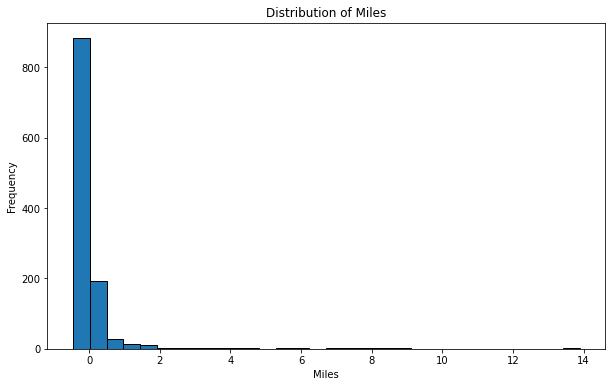

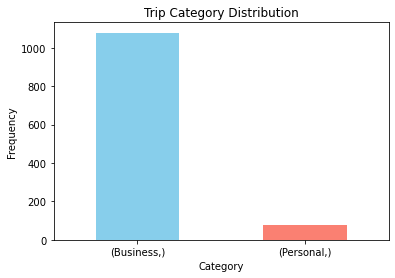

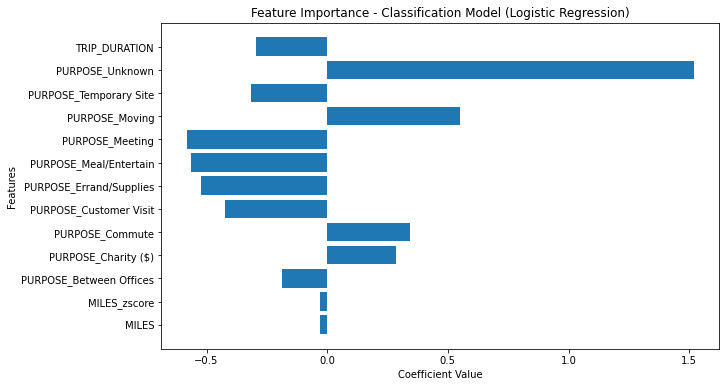

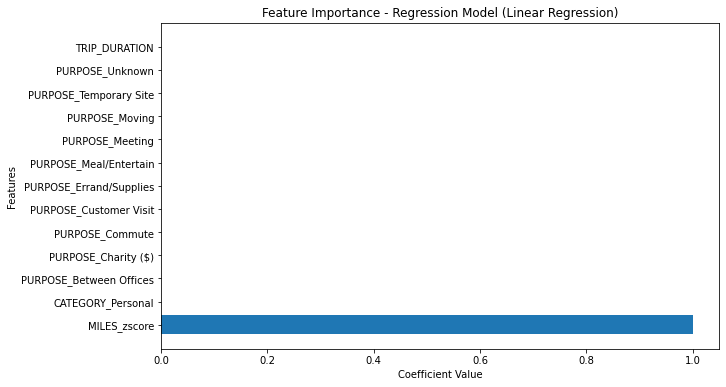

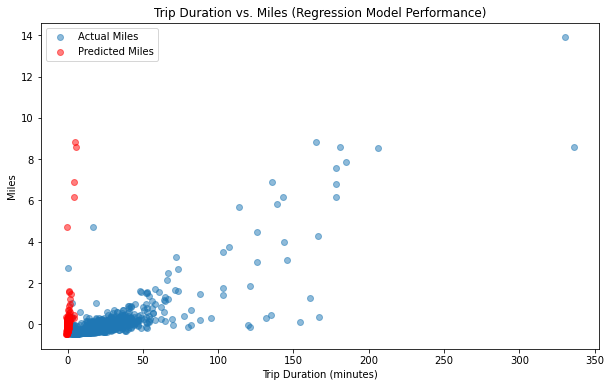

In [15]:
#Part 4

# Step 21: Data Distribution
# Distribution of the 'MILES' feature
plt.figure(figsize=(10, 6))
plt.hist(final_data['MILES'], bins=30, edgecolor='black')
plt.title("Distribution of Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Bar plot for trip 'CATEGORY'
category_counts = final_data[['CATEGORY_Personal']].replace({1: 'Personal', 0: 'Business'}).value_counts()
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Trip Category Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Step 22: Feature Importance
# Feature names from original data for classification and regression
classification_feature_names = final_data.drop(columns=['CATEGORY_Personal']).columns
regression_feature_names = final_data.drop(columns=['MILES']).columns

# Feature importance for Logistic Regression (Classification)
if hasattr(classification_model, 'coef_'):
    plt.figure(figsize=(10, 6))
    plt.barh(classification_feature_names, classification_model.coef_[0])
    plt.title("Feature Importance - Classification Model (Logistic Regression)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.show()

# Feature importance for Linear Regression (Regression)
if hasattr(regression_model, 'coef_'):
    plt.figure(figsize=(10, 6))
    plt.barh(regression_feature_names, regression_model.coef_)
    plt.title("Feature Importance - Regression Model (Linear Regression)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.show()

# Step 23: Model Performance Across Features
# Plotting MILES vs. TRIP_DURATION to see how well the regression model predicts miles based on duration
plt.figure(figsize=(10, 6))
plt.scatter(final_data['TRIP_DURATION'], final_data['MILES'], alpha=0.5, label="Actual Miles")
plt.scatter(X_test_reg[:, list(regression_feature_names).index('TRIP_DURATION')], y_pred_reg, color='red', alpha=0.5, label="Predicted Miles")
plt.title("Trip Duration vs. Miles (Regression Model Performance)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Miles")
plt.legend()
plt.show()
